#Install Libraries

In [6]:
! pip install --upgrade --quiet pycaret

#Import

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()
from pycaret.utils import check_metric


In [8]:
from pycaret.classification import *

#read clean dataset

In [9]:
clean_df= pd.read_csv('/content/drive/MyDrive/Capstone Project/Data Files/Bank Loan Default_CleanBaseLine_v3.0.csv')

In [10]:
clean_df.shape

(119145, 19)

In [11]:
colsToDrop = ["funded_amnt"]
clean_df.drop(colsToDrop, axis=1, inplace=True)
clean_df.reset_index(drop=True, inplace=True)
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119145 entries, 0 to 119144
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   member_id        119145 non-null  int64  
 1   loan_amnt        119145 non-null  int64  
 2   funded_amnt_inv  119145 non-null  float64
 3   term             119145 non-null  object 
 4   int_rate         119145 non-null  float64
 5   installment      119145 non-null  float64
 6   grade            119145 non-null  object 
 7   emp_length       119145 non-null  int64  
 8   home_ownership   119145 non-null  object 
 9   annual_inc       119145 non-null  float64
 10  purpose          119145 non-null  object 
 11  addr_state       119145 non-null  object 
 12  dti              119145 non-null  float64
 13  open_acc         119145 non-null  int64  
 14  revol_bal        119145 non-null  int64  
 15  revol_util       119145 non-null  float64
 16  total_acc        119145 non-null  int6

In [12]:
clean_df.describe()

,member_id,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc
count,1.191450e+05,119145.000000,119145.000000,119145.000000,119145.000000,119145.000000,1.191450e+05,119145.000000,119145.000000,1.191450e+05,119145.000000,119145.000000
mean,4.288577e+06,12983.233245,12768.857110,13.293940,405.638227,5.615284,7.271525e+04,15.747740,10.560074,1.518657e+04,54.403271,24.304436
std,3.466994e+06,7814.069451,7801.040626,4.255294,240.125605,3.558068,6.141642e+04,7.555979,4.597446,1.796964e+04,25.115202,11.364550
min,7.069900e+04,500.000000,0.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,1.240242e+06,7000.000000,6975.000000,10.160000,226.070000,2.000000,4.500000e+04,10.070000,7.000000,5.966000e+03,36.400000,16.000000
50%,2.839634e+06,11300.000000,11000.000000,13.110000,357.030000,5.000000,6.200000e+04,15.430000,10.000000,1.113500e+04,56.400000,23.000000
75%,7.277043e+06,18000.000000,17500.000000,15.960000,532.350000,10.000000,8.700000e+04,21.110000,13.000000,1.926900e+04,74.400000,31.000000
max,1.209697e+07,35000.000000,35000.000000,26.060000,1407.010000,10.000000,7.141778e+06,34.990000,52.000000,1.743266e+06,122.500000,99.000000


In [13]:
clean_df.describe(include=[np.object])

,term,grade,home_ownership,purpose,addr_state,loan_status
count,119145,119145,119145,119145,119145,119145
unique,2,7,5,14,50,2
top,36 months,B,MORTGAGE,debt_consolidation,CA,Fully Paid
freq,98567,41450,59846,67115,20891,115862


In [14]:
clean_df.loc[(clean_df.loan_status == 'Fully Paid'),'loan_status']=0
clean_df.loc[(clean_df.loan_status == 'Default'),'loan_status']=1
clean_df['loan_status']= pd.to_numeric(clean_df['loan_status'])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119145 entries, 0 to 119144
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   member_id        119145 non-null  int64  
 1   loan_amnt        119145 non-null  int64  
 2   funded_amnt_inv  119145 non-null  float64
 3   term             119145 non-null  object 
 4   int_rate         119145 non-null  float64
 5   installment      119145 non-null  float64
 6   grade            119145 non-null  object 
 7   emp_length       119145 non-null  int64  
 8   home_ownership   119145 non-null  object 
 9   annual_inc       119145 non-null  float64
 10  purpose          119145 non-null  object 
 11  addr_state       119145 non-null  object 
 12  dti              119145 non-null  float64
 13  open_acc         119145 non-null  int64  
 14  revol_bal        119145 non-null  int64  
 15  revol_util       119145 non-null  float64
 16  total_acc        119145 non-null  int6

In [15]:
clean_df.isna().sum()

member_id          0
loan_amnt          0
funded_amnt_inv    0
term               0
int_rate           0
installment        0
grade              0
emp_length         0
home_ownership     0
annual_inc         0
purpose            0
addr_state         0
dti                0
open_acc           0
revol_bal          0
revol_util         0
total_acc          0
loan_status        0
dtype: int64

# Getting the Data

In [16]:
Exp_Df = clean_df.copy()
Exp_Df.loc[(Exp_Df.loan_status == 'Fully Paid'),'loan_status']=0
Exp_Df.loc[(Exp_Df.loan_status == 'Default'),'loan_status']=1
Exp_Df['loan_status']= pd.to_numeric(Exp_Df['loan_status'])

In [17]:
data = Exp_Df.sample(frac=0.70, random_state=12345)
data_unseen = Exp_Df.drop(data.index)
data.reset_index()
data_unseen.reset_index()
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (83402, 18)
Unseen Data For Predictions: (35743, 18)


# Setting up Environment in PyCaret

In [18]:
exp_clf101 = setup(data = data, target ='loan_status',train_size=1.0, test_data=data_unseen,
                   imputation_type = 'simple' , normalize =True, normalize_method='zscore' ,
                   transformation=True,transformation_method= 'yeo-johnson',
                   pca= True, pca_method= 'linear', remove_multicollinearity= True,
                   remove_perfect_collinearity =True, create_clusters=True, cluster_iter=20,
                   polynomial_features=True,polynomial_degree=2,trigonometry_features=True,
                   fix_imbalance=True, data_split_stratify =True,session_id=123)
                   

,Description,Value
0,session_id,123
1,Target,loan_status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(83402, 18)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


#Comparing All Models

In [19]:
models_list= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9720,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.659
et,Extra Trees Classifier,0.9700,0.7642,0.0124,0.1263,0.0225,0.0178,0.0313,40.063
rf,Random Forest Classifier,0.9667,0.7562,0.0222,0.0952,0.0360,0.0258,0.0331,202.104
lightgbm,Light Gradient Boosting Machine,0.9171,0.7676,0.2180,0.0911,0.1285,0.0926,0.1024,7.742
dt,Decision Tree Classifier,0.8982,0.5331,0.1462,0.0500,0.0745,0.0342,0.0398,30.789
gbc,Gradient Boosting Classifier,0.8142,0.7820,0.5156,0.0775,0.1347,0.0904,0.1434,357.074
ada,Ada Boost Classifier,0.7965,0.7426,0.4793,0.0664,0.1167,0.0709,0.1171,64.149
knn,K Neighbors Classifier,0.7667,0.6686,0.4648,0.0564,0.1005,0.0532,0.0941,169.552
lr,Logistic Regression,0.7115,0.8024,0.7379,0.0686,0.1255,0.0782,0.1614,3.007
ridge,Ridge Classifier,0.6915,0.0000,0.7644,0.0663,0.1221,0.0743,0.1602,0.766


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


#Decision Tree

In [20]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8945,0.5224,0.1282,0.0425,0.0638,0.0226,0.0266
1,0.8964,0.5504,0.1838,0.0601,0.0905,0.0504,0.0594
2,0.9014,0.5429,0.1631,0.0571,0.0846,0.0451,0.0522
3,0.8958,0.5314,0.1453,0.0484,0.0726,0.0318,0.0373
4,0.9002,0.5171,0.1111,0.0400,0.0588,0.0183,0.0210
5,0.8972,0.5155,0.1111,0.0385,0.0572,0.0162,0.0188
6,0.9016,0.5509,0.1795,0.0626,0.0928,0.0534,0.0619
7,0.8992,0.5393,0.1581,0.0543,0.0809,0.0408,0.0474
8,0.8959,0.5190,0.1197,0.0406,0.0606,0.0195,0.0228
9,0.8998,0.5417,0.1624,0.0560,0.0833,0.0434,0.0504


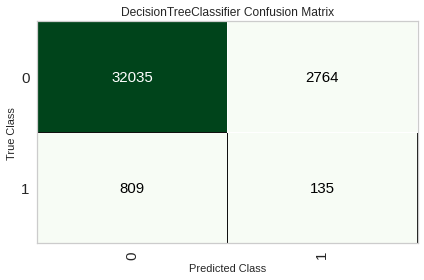

In [21]:
plot_model(dt, plot = 'confusion_matrix')

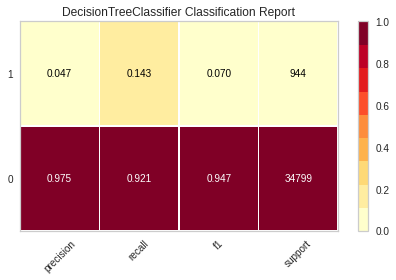

In [22]:
plot_model(dt, plot = 'class_report')

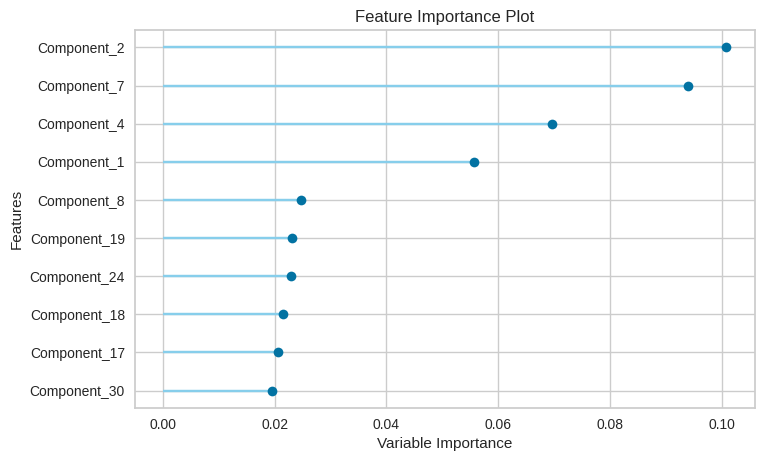

In [23]:
plot_model(dt, plot = 'feature')

In [24]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9719,0.5,0.0,0.0,0.0,0.0,0.0
1,0.9719,0.5,0.0,0.0,0.0,0.0,0.0
2,0.9721,0.5,0.0,0.0,0.0,0.0,0.0
3,0.9719,0.5,0.0,0.0,0.0,0.0,0.0
4,0.9719,0.5,0.0,0.0,0.0,0.0,0.0
5,0.9719,0.5,0.0,0.0,0.0,0.0,0.0
6,0.9719,0.5,0.0,0.0,0.0,0.0,0.0
7,0.9719,0.5,0.0,0.0,0.0,0.0,0.0
8,0.9719,0.5,0.0,0.0,0.0,0.0,0.0
9,0.9719,0.5,0.0,0.0,0.0,0.0,0.0


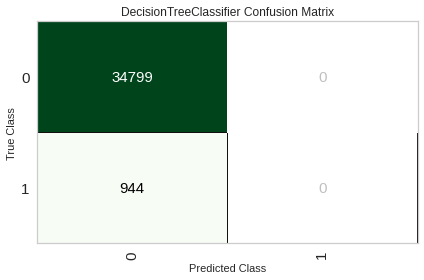

In [25]:
plot_model(tuned_dt, plot = 'confusion_matrix')

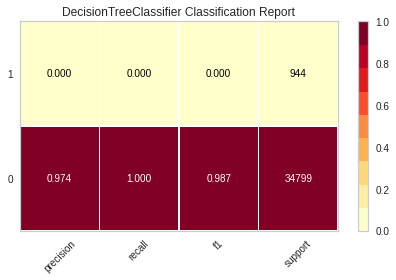

In [26]:
plot_model(tuned_dt, plot = 'class_report')

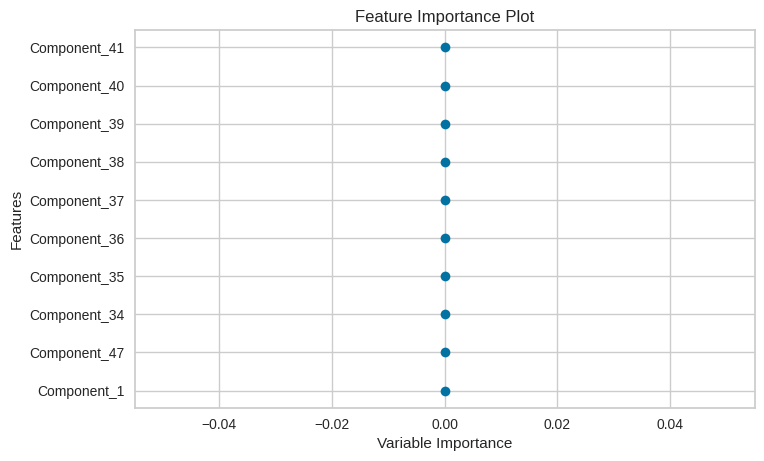

In [27]:
plot_model(tuned_dt, plot = 'feature')

In [28]:
boost_dt = ensemble_model(tuned_dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9719,0.5,0.0,0.0,0.0,0.0,0.0
1,0.9719,0.5,0.0,0.0,0.0,0.0,0.0
2,0.9721,0.5,0.0,0.0,0.0,0.0,0.0
3,0.9719,0.5,0.0,0.0,0.0,0.0,0.0
4,0.9719,0.5,0.0,0.0,0.0,0.0,0.0
5,0.9719,0.5,0.0,0.0,0.0,0.0,0.0
6,0.9719,0.5,0.0,0.0,0.0,0.0,0.0
7,0.9719,0.5,0.0,0.0,0.0,0.0,0.0
8,0.9719,0.5,0.0,0.0,0.0,0.0,0.0
9,0.9719,0.5,0.0,0.0,0.0,0.0,0.0


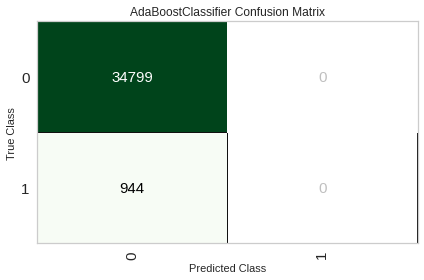

In [29]:
plot_model(boost_dt, plot = 'confusion_matrix')

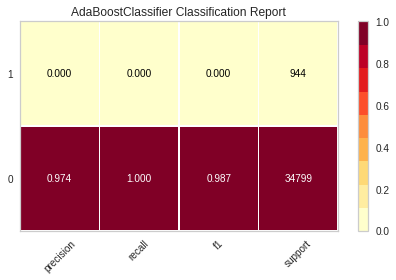

In [30]:
plot_model(boost_dt, plot = 'class_report')

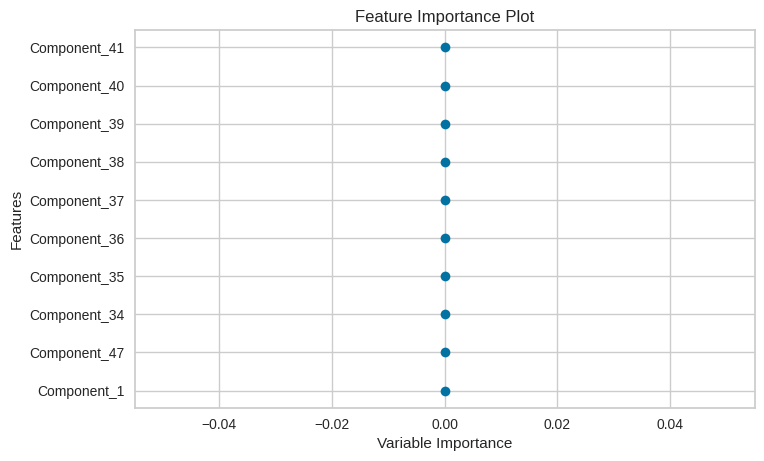

In [31]:
plot_model(boost_dt, plot = 'feature')